In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pickle
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

# Full state results

In [15]:
dataset = "full-state-predictions"
filepath = "generated-data/%s/results/binary-output.pickle" % dataset

# Read file
with open(filepath, "rb") as f:
    data = pickle.load(f)
    thetas = data["thetas"]
    epistasis = data["epistasis"]

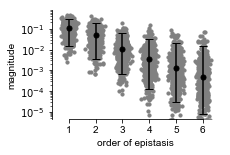

In [16]:
fig, ax = plt.subplots(figsize=(3,2))

for i in range(len(epistasis)):
    y = epistasis[i]
    x = np.arange(1, len(y)+1) + np.random.randn(len(y))*.1 
    ax.scatter(x, y, color='gray', s=10)

meanx = np.arange(1, 7)
out = np.nanpercentile(epistasis, (50, 2.5, 97.5), axis=0)
ymean, ylower, yupper = out[0], abs(out[0] - out[1]), abs(out[0] - out[2])
ax.errorbar(meanx, ymean, yerr=[ylower, yupper], color="k", fmt="o", ms=5, capsize=4)

ax.set_yscale('log')
#ax.set_ylim(ymin=1e-8)
ax.set_xlabel("order of epistasis")
ax.set_ylabel("magnitude")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
#ax.spines["bottom"].set_visible(False)
ticks = ax.set_xticks(range(1,7))
ax.spines["bottom"].set_bounds(1,6)
#fig.savefig("figures/full-state-epistasis.pdf", format="pdf", bbox_inches="tight")

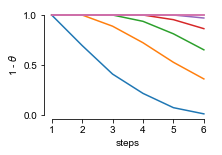

In [17]:
fig, ax = plt.subplots(figsize=(3,2))

for i in range(1, len(thetas)+1):
    y = np.array(thetas[i])
    #x = np.ones(y.shape) * np.arange(1,7) + np.random.randn(*y.shape)*1e-1
    y50 = np.nanpercentile(y, 50, axis=0)
    x50 = np.arange(1, len(y50)+1)
    #ax.scatter(x, 1-y, alpha=.2, color='C' + str(i-1), s=10)
    #ax.plot(x50, 1-y50, marker="o", linestyle="-", color='C' + str(i-1))
    ax.plot(x50, 1-np.nanmean(y, axis=0),  linestyle="-", color='C' + str(i-1))
    #ax.plot(x, 1-ymean, color='C' + str(i-1), linestyle="-", marker="o", alpha=1)
    #ax.fill_between(x, 1-ylower, 1-yupper, color="C"+str(i-1), alpha=0.2, interpolate=True)

ax.set_xlabel("steps")
ax.set_ylabel("1 - $\\theta$")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xticks(range(1,7))
ax.spines["bottom"].set_bounds(1,6)
ax.spines["left"].set_bounds(0,1)
ax.set_yticks([0,.5,1])
fig.savefig("figures/full-state-binary-predictions.pdf", format="pdf", bbox_inches="tight")
# ax1.fill_between(x, 0, y1)

# Two state results

In [18]:
dataset = "two-state-predictions"
filepath = "generated-data/%s/results/binary-output.pickle" % dataset

# Read file
with open(filepath, "rb") as f:
    data = pickle.load(f)
    thetas = data["thetas"]
    epistasis = data["epistasis"]

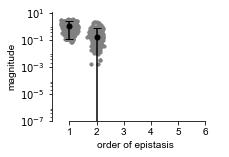

In [19]:
fig, ax = plt.subplots(figsize=(3,2))

for i in range(len(epistasis)):
    y = epistasis[i]
    x = np.arange(1, len(y)+1) + np.random.randn(len(y))*.1 
    ax.scatter(x, y, color='gray', s=10)

xmean = np.arange(1, 7)
out = np.nanpercentile(epistasis, (50, 2.5, 97.5), axis=0)
ymean, ylower, yupper = out[0], abs(out[0] - out[1]), abs(out[0] - out[2])
ax.errorbar(xmean, ymean, yerr=[ylower, yupper], color="k", fmt="o", ms=5, capsize=4)

ax.set_yscale('log')
ax.set_ylim(ymin=1e-7)
ax.set_xlabel("order of epistasis")
ax.set_ylabel("magnitude")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
#ax.spines["bottom"].set_visible(False)
ticks = ax.set_xticks(range(1,7))
ax.spines["bottom"].set_bounds(1,6)
#fig.savefig("figures/two-state-epistasis.pdf", format="pdf", bbox_inches="tight")

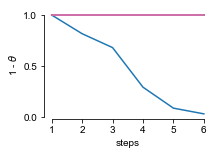

In [20]:
fig, ax = plt.subplots(figsize=(3,2))

for i in range(1, len(thetas)+1):
    y = np.array(thetas[i])
    #x = np.ones(y.shape) * np.arange(1,7) + np.random.randn(*y.shape)*1e-1
    y50 = np.nanpercentile(y, 50, axis=0)
    x50 = np.arange(1, len(y50)+1)
    #ax.scatter(x, 1-y, alpha=.2, color='C' + str(i-1), s=10)
    #ax.plot(x50, 1-y50, marker="o", linestyle="-", color='C' + str(i-1))
    ax.plot(x50, 1-np.nanmean(y, axis=0),  linestyle="-", color='C' + str(i-1))
    #ax.plot(x, 1-ymean, color='C' + str(i-1), linestyle="-", marker="o", alpha=1)
    #ax.fill_between(x, 1-ylower, 1-yupper, color="C"+str(i-1), alpha=0.2, interpolate=True)

ax.set_xlabel("steps")
ax.set_ylabel("1 - $\\theta$")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xticks(range(1,7))
ax.spines["bottom"].set_bounds(1,6)
ax.spines["left"].set_bounds(0,1)
ax.set_yticks([0,.5,1])
fig.savefig("figures/two-state-binary-predictions.pdf", format="pdf", bbox_inches="tight")
# ax1.fill_between(x, 0, y1)